In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# use get_db_url function to connect to the codeup db
from env import get_db_url

# custom module imports
import wrangle_zillow as wz

### Get the data

In [2]:
df = wz.get_zillow_data()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,None,NaN,6.037124e+13,Central,None,None,Central,Condominium,None,None


In [4]:
df.shape

(77579, 69)

In [3]:
df, train, validate, test = wz.prepare_zillow(df)

values have been imputed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48330 entries, 0 to 77578
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         48330 non-null  float64
 1   parcelid                      48330 non-null  int64  
 2   id                            48330 non-null  int64  
 3   logerror                      48330 non-null  float64
 4   transactiondate               48330 non-null  object 
 5   bathroomcnt                   48330 non-null  float64
 6   bedroomcnt                    48330 non-null  float64
 7   calculatedbathnbr             48316 non-null  float64
 8   calculatedfinishedsquarefeet  48330 non-null  float64
 9   finishedsquarefeet12          48176 non-null  float64
 10  fips                          48330 non-null  float64
 11  fullbathcnt                   48316 non-null  float64
 12  latitude                      48330 non-null  float64
 13  l

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27064 entries, 40598 to 53934
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         27064 non-null  float64
 1   parcelid                      27064 non-null  int64  
 2   id                            27064 non-null  int64  
 3   logerror                      27064 non-null  float64
 4   transactiondate               27064 non-null  object 
 5   bathroomcnt                   27064 non-null  float64
 6   bedroomcnt                    27064 non-null  float64
 7   calculatedbathnbr             27064 non-null  float64
 8   calculatedfinishedsquarefeet  27064 non-null  float64
 9   finishedsquarefeet12          27064 non-null  float64
 10  fips                          27064 non-null  float64
 11  fullbathcnt                   27064 non-null  float64
 12  latitude                      27064 non-null  float64
 1

In [6]:
# check for duplicate parcelid
test.parcelid.value_counts()

17198094    1
11329885    1
11205980    1
14073117    1
11842844    1
           ..
11915855    1
11289165    1
13955659    1
11516490    1
14053382    1
Name: parcelid, Length: 9666, dtype: int64

In [6]:
# drop duplicate parcelid keeping the latest one by transaction date
df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')


In [7]:
df.shape

(77381, 69)

In [8]:
wz.summarize(df)

----------------------
Dataframe head
   typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0                     NaN          NaN                  261.0   
1                     NaN          NaN                  261.0   
2                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid  parcelid  id  logerror  ... taxdelinquencyflag  \
0                    NaN  14297519   0  0.025595  ...               None   
1                    NaN  17052889   1  0.055619  ...               None   
2                    NaN  14186244   2  0.005383  ...               None   

   taxdelinquencyyear  censustractandblock  airconditioningdesc  \
0                 NaN       

(6036.925, 6044.4]    50551
(6044.4, 6051.8]          0
(6051.8, 6059.2]      20593
(6059.2, 6066.6]          0
(6066.6, 6074.0]          0
(6074.0, 6081.4]          0
(6081.4, 6088.8]          0
(6088.8, 6096.2]          0
(6096.2, 6103.6]          0
(6103.6, 6111.0]       6237
Name: fips, dtype: int64
(0.995, 1.4]    7008
(1.4, 1.8]         0
(1.8, 2.2]       995
(2.2, 2.6]         0
(2.6, 3.0]       235
(3.0, 3.4]         0
(3.4, 3.8]         0
(3.8, 4.2]        35
(4.2, 4.6]         0
(4.6, 5.0]         3
Name: fireplacecnt, dtype: int64
(0.982, 2.7]    52407
(2.7, 4.4]      22399
(4.4, 6.1]       1699
(6.1, 7.8]        121
(7.8, 9.5]        134
(9.5, 11.2]        10
(11.2, 12.9]        0
(12.9, 14.6]        1
(14.6, 16.3]        0
(16.3, 18.0]        1
Name: fullbathcnt, dtype: int64
(-0.015, 1.4]     5906
(1.4, 2.8]       18608
(2.8, 4.2]         887
(4.2, 5.6]          45
(5.6, 7.0]          18
(7.0, 8.4]           2
(8.4, 9.8]           2
(9.8, 11.2]          4
(11.2, 12.6]    

                 percent_cols_missing  num_rows
num_cols_missing                               
23                  33.82352941176471         2
24                 35.294117647058826        13
25                  36.76470588235294        24
26                  38.23529411764706        65
27                 39.705882352941174       316
28                  41.17647058823529       455
29                  42.64705882352941      5270
30                  44.11764705882353      3455
31                 45.588235294117645      9891
32                  47.05882352941176     12579
33                 48.529411764705884     14782
34                               50.0     13327
35                 51.470588235294116      5148
36                  52.94117647058824      5775
37                  54.41176470588235      3620
38                  55.88235294117647      1925
39                  57.35294117647059       285
40                  58.82352941176471       230
41                  60.29411764705882   

## Takeaways

- 35% nulls in heatingorsystemtypeid, buildingqualitytypeid
- 5% nulls in calculatedbathnbr
- 

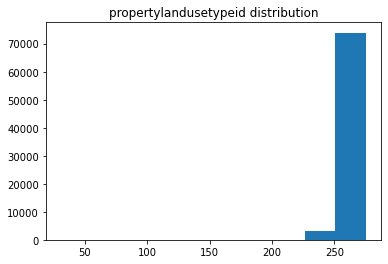

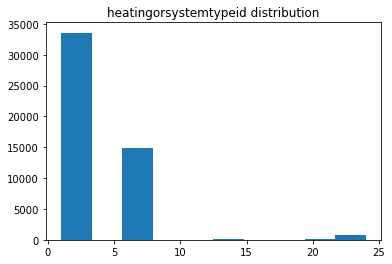

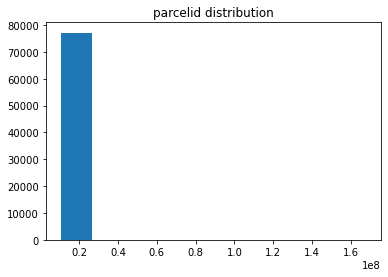

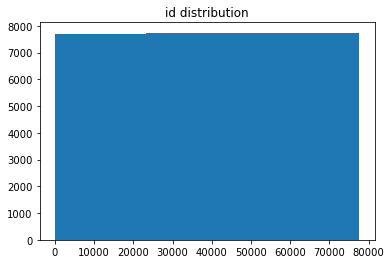

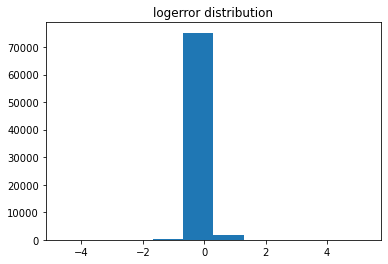

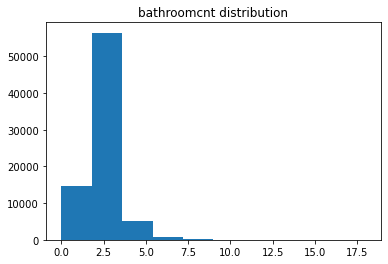

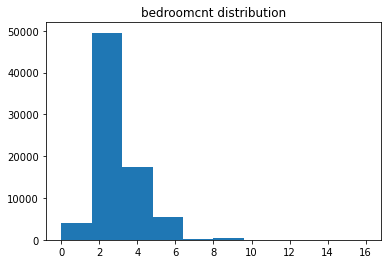

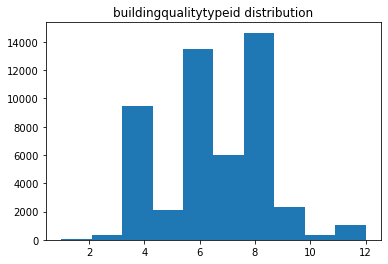

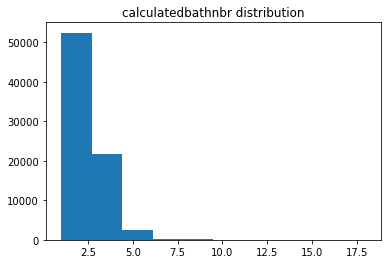

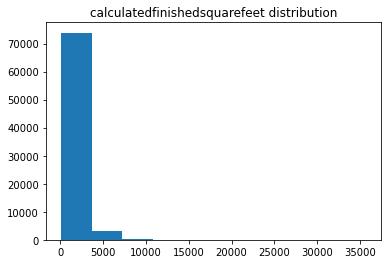

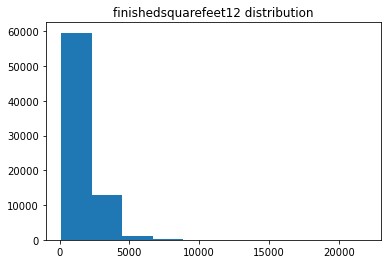

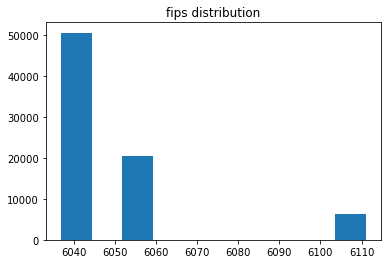

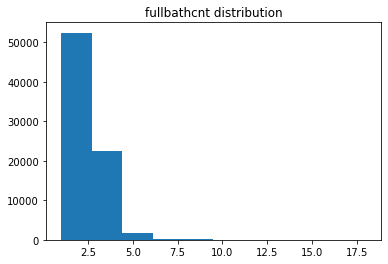

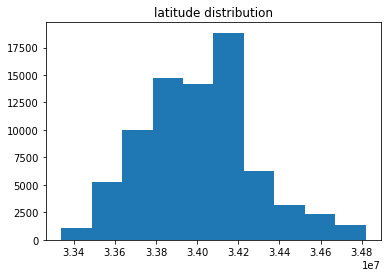

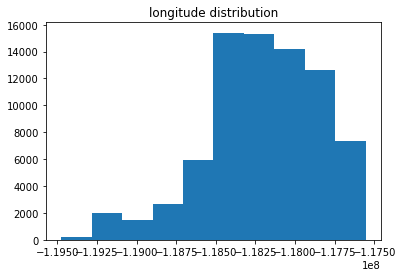

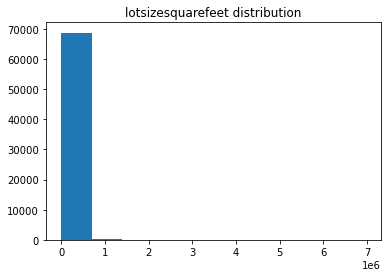

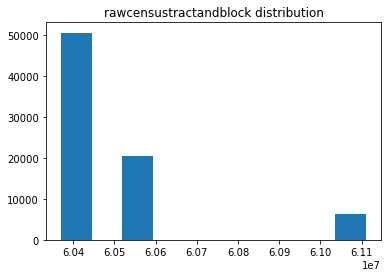

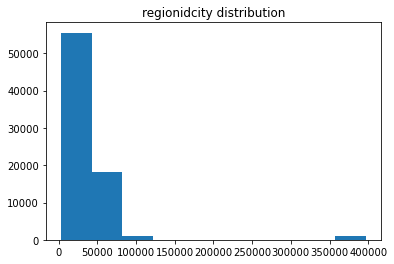

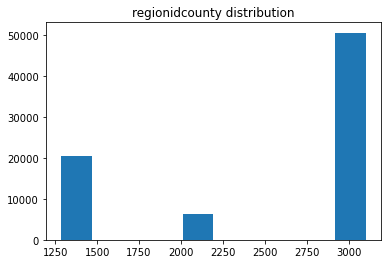

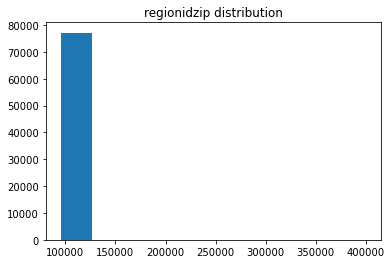

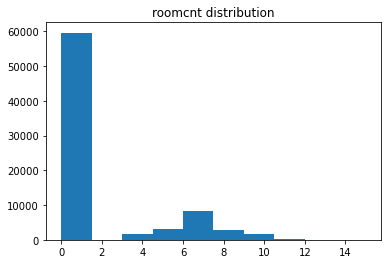

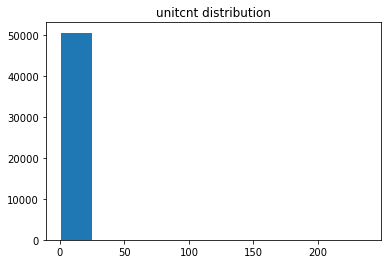

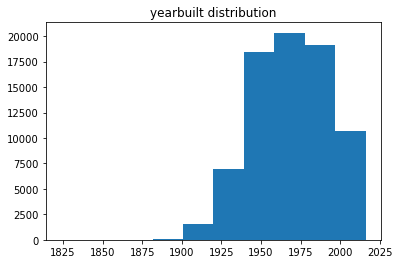

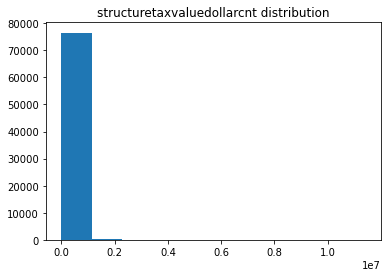

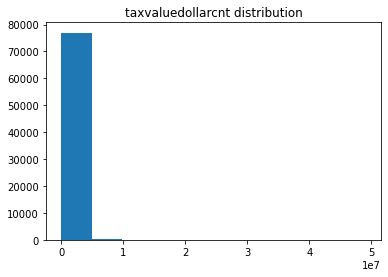

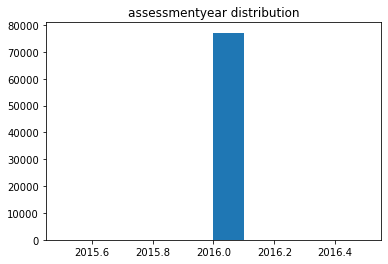

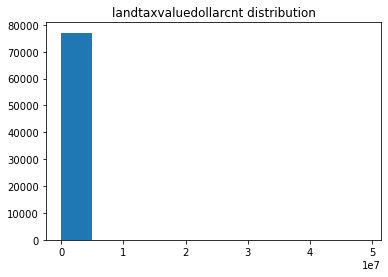

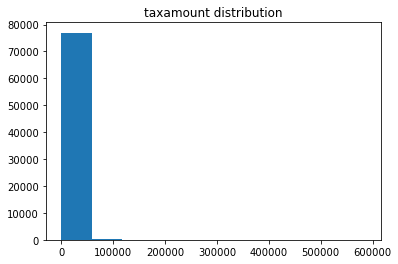

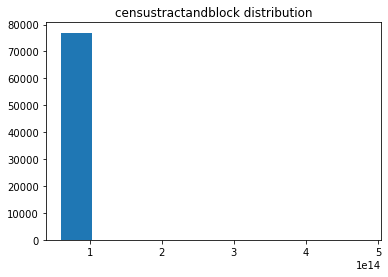

In [57]:
# distribution of the data
con_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for col in con_cols:
    plt.hist(df[col])
    plt.title(f"{col} distribution")
    plt.show()

In [12]:
train.head()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,propertylandusedesc
42845,246.0,NaN,12084778,42864,0.031278,2017-06-02,2.0,3.0,NaN,2.0,...,2.0,1938.0,104997.0,225744.0,2016.0,120747.0,2852.31,6.037186e+13,None,"Duplex (2 Units, Any Combination)"
44661,261.0,2.0,11870054,44680,0.025454,2017-06-08,2.0,4.0,6.0,2.0,...,1.0,1962.0,195062.0,543689.0,2016.0,348627.0,8024.06,6.037530e+13,Central,Single Family Residential
41812,261.0,2.0,12421614,41830,-0.014139,2017-05-31,2.0,3.0,6.0,2.0,...,1.0,1962.0,169648.0,573615.0,2016.0,403967.0,6748.73,6.037571e+13,Central,Single Family Residential
11160,266.0,2.0,12246586,11169,-0.045873,2017-02-21,3.0,3.0,7.0,3.0,...,1.0,1981.0,120847.0,151053.0,2016.0,30206.0,1989.73,6.037603e+13,Central,Condominium
26439,261.0,7.0,11955066,26452,-0.071121,2017-04-14,1.0,2.0,4.0,1.0,...,1.0,1927.0,113635.0,377705.0,2016.0,264070.0,4698.28,6.037197e+13,Floor/Wall,Single Family Residential


In [13]:
# scale cols
X_train = train[['taxvaluedollarcnt',
 'bedroomcnt',  
 'calculatedfinishedsquarefeet',  
  'taxamount']]
X_validate = validate[['taxvaluedollarcnt',
 'bedroomcnt',  
 'calculatedfinishedsquarefeet',  
  'taxamount']]
X_test = test[['taxvaluedollarcnt',
 'bedroomcnt',  
 'calculatedfinishedsquarefeet',  
  'taxamount']]

In [14]:
# call scaling function
X_train_scaled, X_validate_scaled, X_test_scaled = wz.scale_data(X_train, X_validate, X_test)

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [66]:
# 1. univariate explorate
# What are the distributions of each variables?

# 2. Bivariate:
#  Does log error vary across property landuse desc


# 3. Bivariate:
# Is there a relationship between log error and taxvaluedollarcnt?

# 4. Is there a relationship between log error and taxamount

# multivariate:
# 5. If we control for bedroomcnt, does log error differ across calculatedfinishedsquarefeet


In [11]:
train.shape, validate.shape, test.shape

((27064, 29), (11600, 29), (9666, 29))

In [9]:
train.columns

Index(['propertylandusetypeid', 'parcelid', 'id', 'logerror',
       'transactiondate', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'propertylandusedesc'],
      dtype='object')

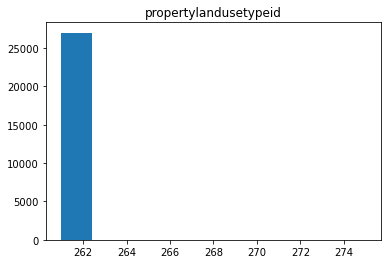

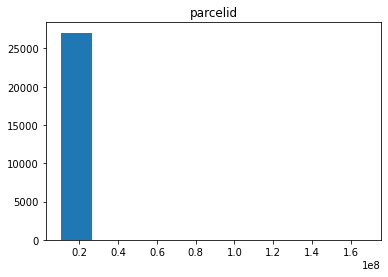

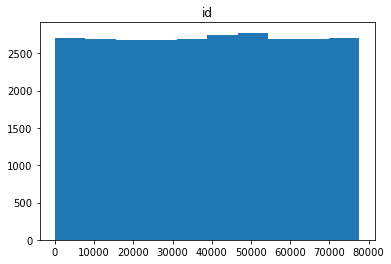

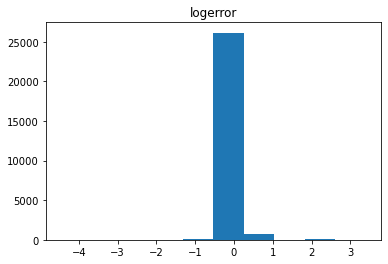

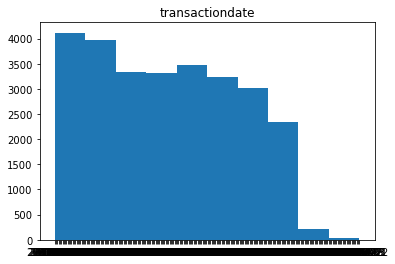

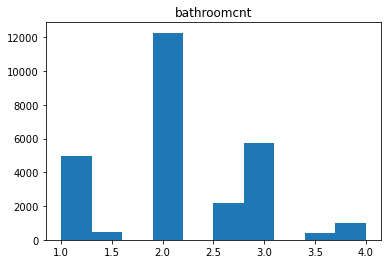

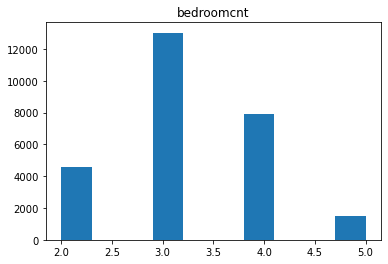

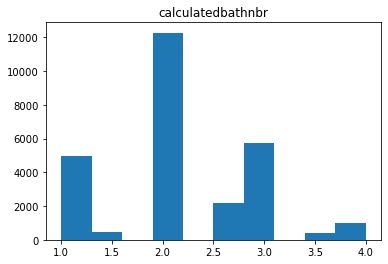

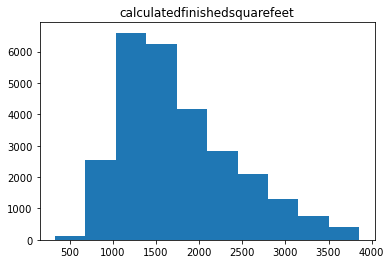

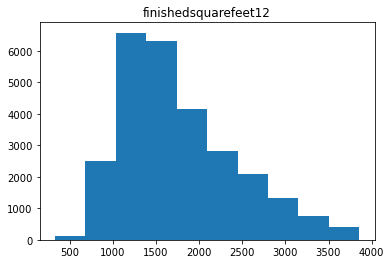

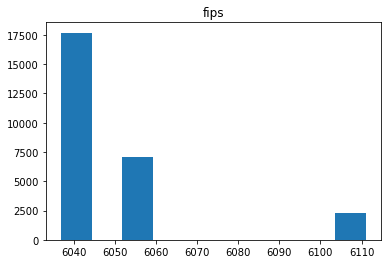

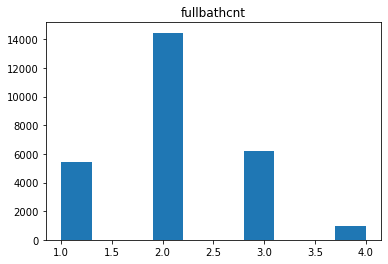

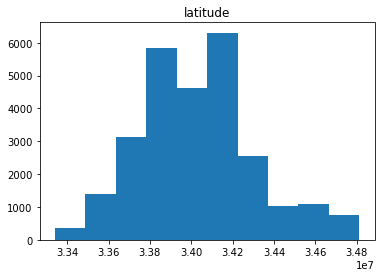

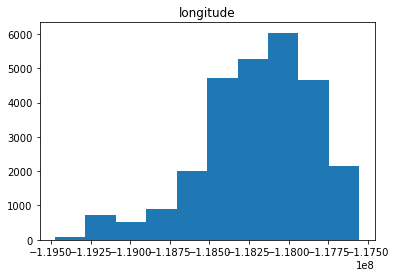

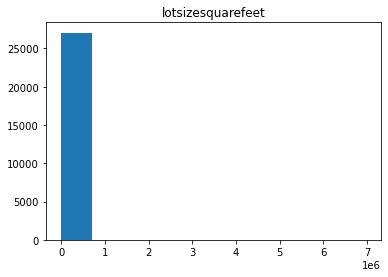

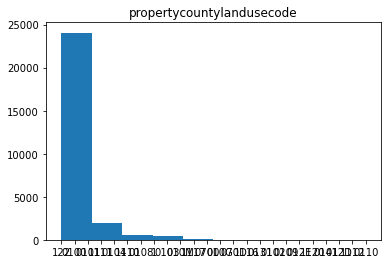

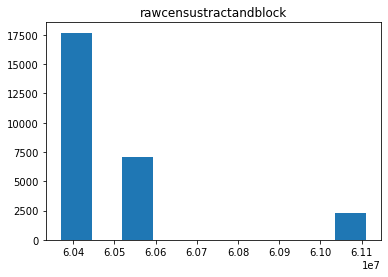

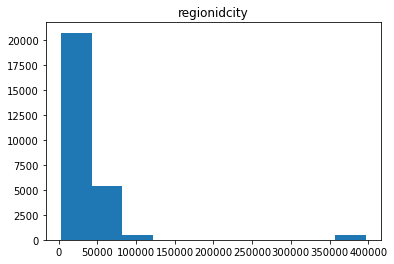

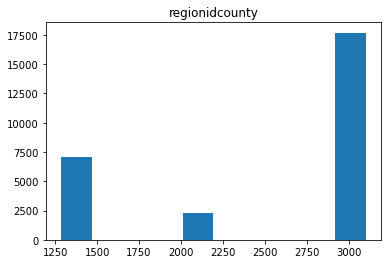

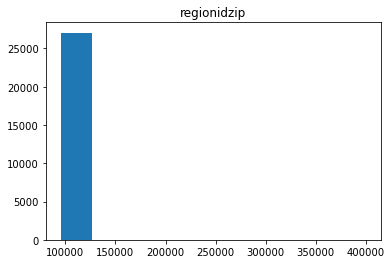

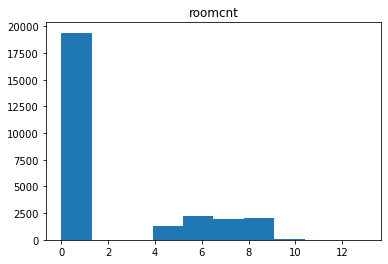

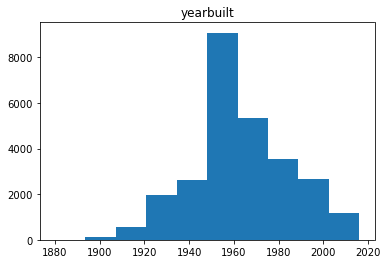

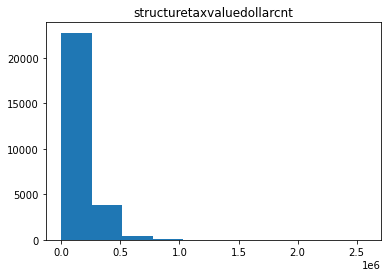

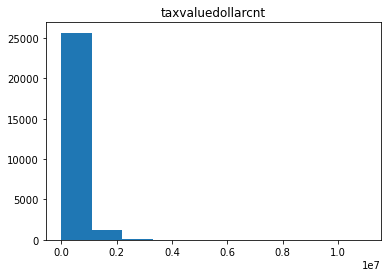

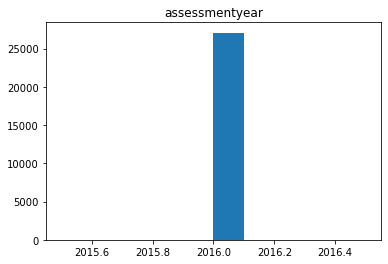

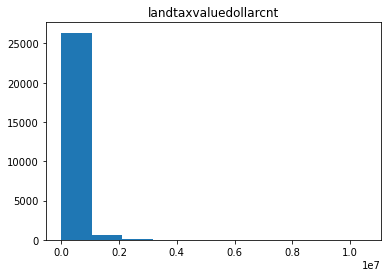

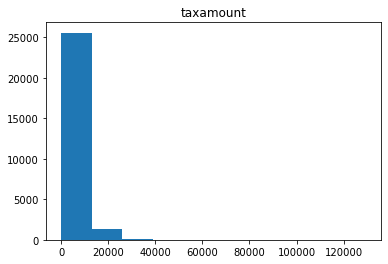

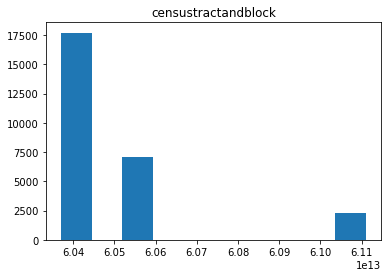

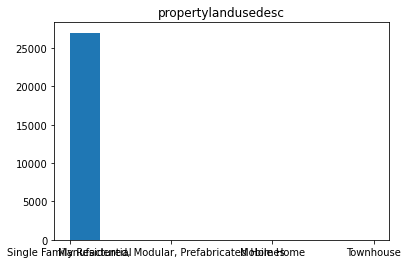

In [12]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


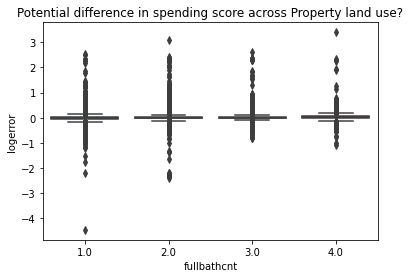

In [22]:
# 2. Bivariate:
#  Does log error vary across property landuse desc
sns.boxplot(train.fullbathcnt, train.logerror)
plt.title('Potential difference in spending score across Property land use?')
plt.show() 

Relationship between Income and Spending Score(?)


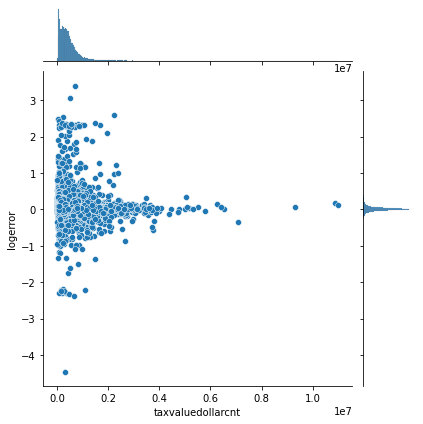

In [8]:
# 3. Bivariate:
# Is there a relationship between log error and taxvaluedollarcnt?
print('Relationship between Income and Spending Score(?)')
sns.jointplot(x='taxvaluedollarcnt', y='logerror', data=train)
plt.xlabel('Taxvalue')
plt.ylabel('Log Error')
plt.show()

- There could possibly be 2 clusters (less than and more than 0.5 tax value)
- No explicit linear correlation

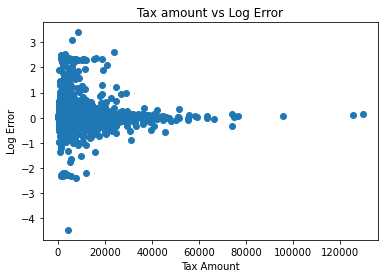

In [10]:
# 4. Is there a relationship between log error and taxamount
plt.scatter(train.taxamount, train.logerror)
plt.xlabel('Tax Amount')
plt.ylabel('Log Error')
plt.title('Tax amount vs Log Error')
plt.show()

In [13]:
# bin tax amt
train['taxamt_bin'] = pd.cut(train.taxamount,[0,10000,20000,40000,80000])

In [19]:
# bin tax amt
train['taxamt_bin2'] = pd.cut(train.taxamount,[0,10000,20000])

In [21]:
train.head()


,propertylandusetypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,taxamt_bin,taxamt_bin2
40598,261.0,14432385,40615,-0.136595,2017-05-26,2.0,3.0,2.0,1716.0,1716.0,...,1962.0,109911.0,344583.0,2016.0,234672.0,4037.82,6.059042e+13,Single Family Residential,"(0, 10000]","(0, 10000]"
41971,261.0,13846579,41989,-0.042961,2017-05-31,2.0,3.0,2.0,1656.0,1656.0,...,1957.0,96086.0,160796.0,2016.0,64710.0,2139.16,6.059075e+13,Single Family Residential,"(0, 10000]","(0, 10000]"
52138,261.0,13919605,52158,0.117969,2017-06-29,3.0,5.0,3.0,2286.0,2286.0,...,1962.0,133757.0,564000.0,2016.0,430243.0,6742.30,6.059087e+13,Single Family Residential,"(0, 10000]","(0, 10000]"
77165,261.0,12264358,77199,0.017466,2017-09-18,1.0,2.0,1.0,802.0,802.0,...,1962.0,97600.0,260000.0,2016.0,162400.0,4687.84,6.037543e+13,Single Family Residential,"(0, 10000]","(0, 10000]"
74147,261.0,11110337,74180,0.010148,2017-09-06,2.0,4.0,2.0,1604.0,1604.0,...,1966.0,108983.0,226444.0,2016.0,117461.0,3331.61,6.037920e+13,Single Family Residential,"(0, 10000]","(0, 10000]"


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


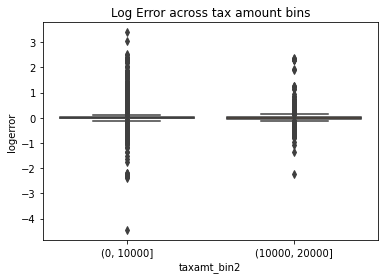

In [23]:
sns.boxplot(train.taxamt_bin2, train.logerror)
plt.title('Log Error across tax amount bins')
plt.show()

In [16]:
# levene H0 : equal variance across logerror between under 20 tax amount group and over 20 group
# alpha = 0.05

stats.levene(train[train.taxamount <= 20000].logerror, train[train.taxamount > 20000].logerror)


LeveneResult(statistic=17.594577905803945, pvalue=2.7423659306957077e-05)

In [17]:
# reject the H0, variance is not equal


In [24]:
# H0: mean_under_20 == mean_over_20
stats.ttest_ind(train[train.taxamount <= 20000].logerror, train[train.taxamount > 20000].logerror, equal_var=False)


Ttest_indResult(statistic=0.08673083904504654, pvalue=0.9309240677852175)

In [26]:
# Fail to Reject the null hypothesis: We do not have an implied difference between the tax amount groups of the log error
# Conclusion: No Difference between the means


In [27]:
train.bedroomcnt.value_counts()

3.0    13027
4.0     7936
2.0     4582
5.0     1519
Name: bedroomcnt, dtype: int64

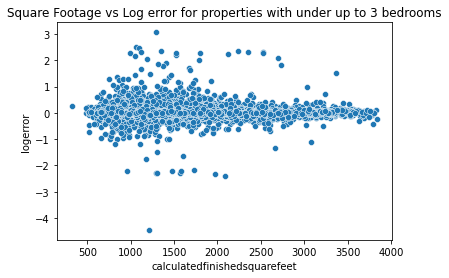

In [36]:
# multivariate:
# 5. If we control for bedroomcnt, does log error differ across calculatedfinishedsquarefeet

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.bedroomcnt <= 3])
plt.title('Square Footage vs Log error for properties with under up to 3 bedrooms')
plt.show()

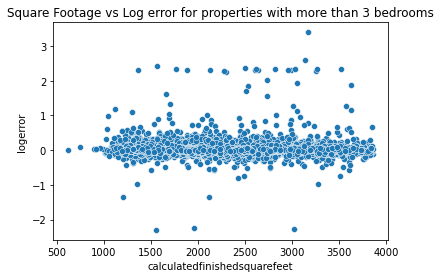

In [38]:
# multivariate:
# 5. If we control for bedroomcnt, does log error differ across calculatedfinishedsquarefeet

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train[train.bedroomcnt > 3])
plt.title('Square Footage vs Log error for properties with more than 3 bedrooms')
plt.show()

In [40]:
train.calculatedfinishedsquarefeet.describe()

count    27064.000000
mean      1762.871157
std        663.229536
min        326.000000
25%       1257.000000
50%       1612.000000
75%       2157.000000
max       3857.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [41]:
train['sqft_bins'] = pd.cut(train.calculatedfinishedsquarefeet, [326,1257,1612,2157, 3857])

In [45]:
cols = ['sqft_bins','logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
        'longitude','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'fips']

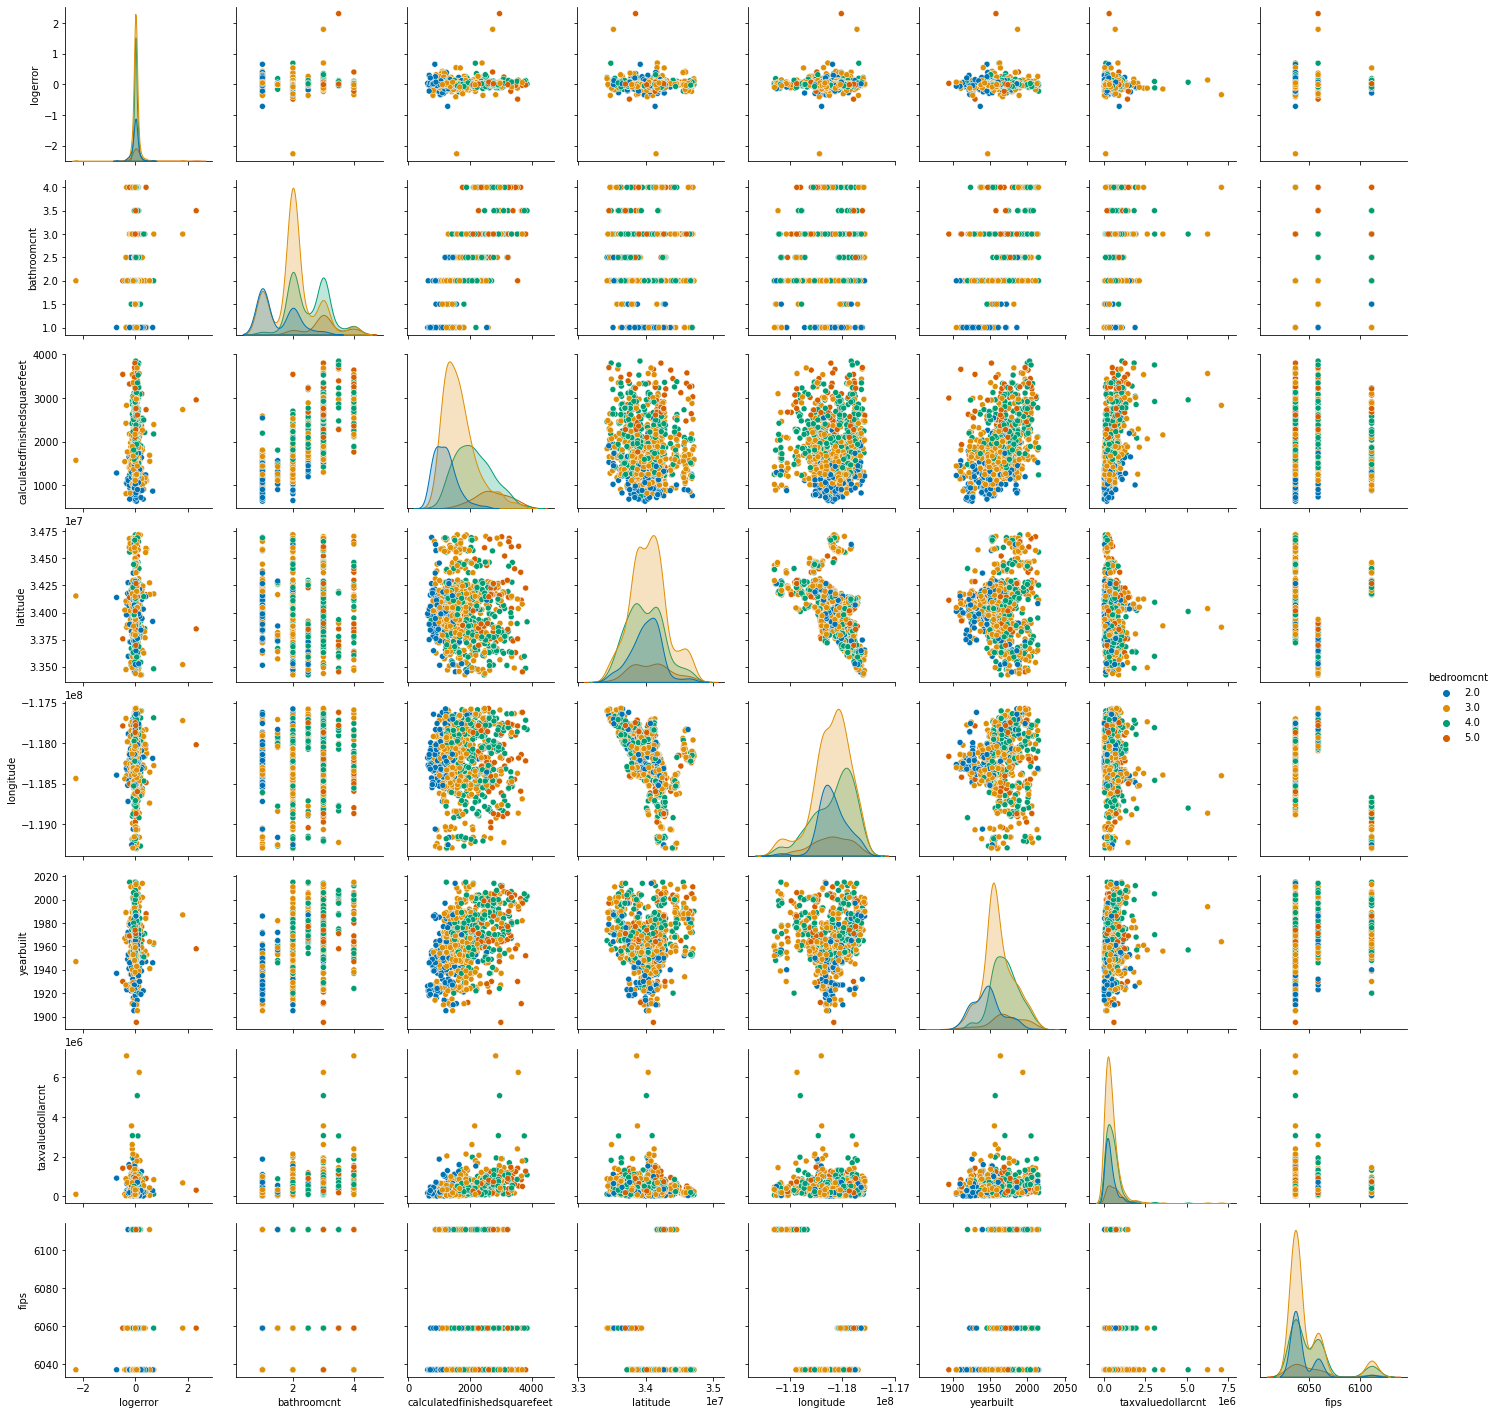

In [48]:
sns.pairplot(data = train[cols].sample(1000), hue = 'bedroomcnt', palette='colorblind')

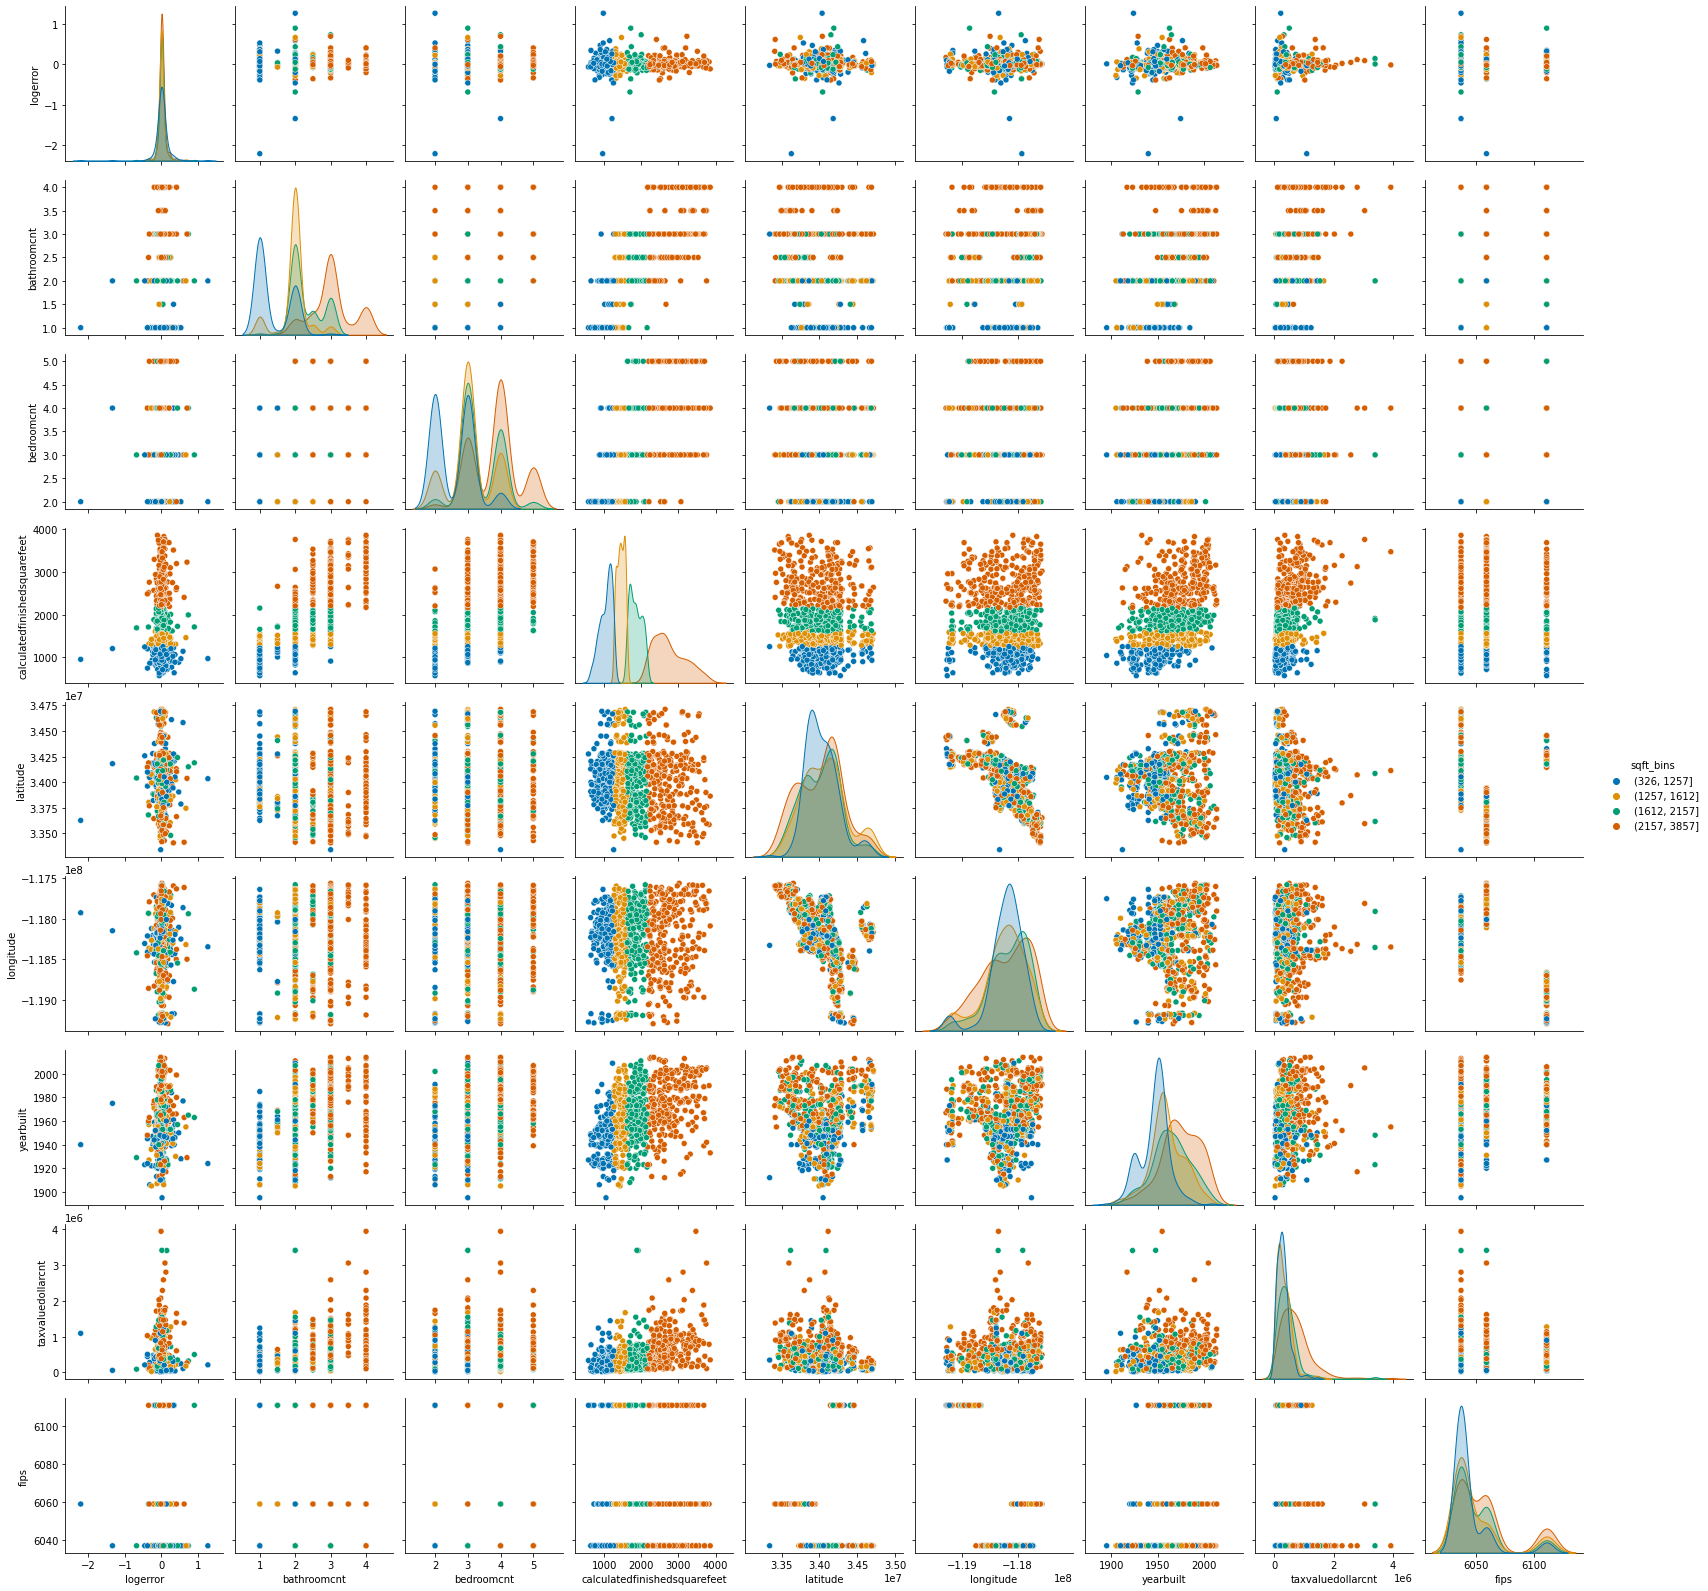

In [49]:
sns.pairplot(data = train[cols].sample(1000), hue = 'sqft_bins', palette='colorblind')